<a href="https://colab.research.google.com/github/Ahmed-Shatla/YaleB_Full_V2_CNN/blob/main/Yale_V2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path1 = '/content/drive/MyDrive/Faces data/FullImage/yaleB13'
path2 = '/content/drive/MyDrive/Faces data/FullImage/yaleB15'
path3 = '/content/drive/MyDrive/Faces data/FullImage/yaleB16'

In [3]:
images = []
label = []

for img in os.listdir(path1):
  if '.pgm' in img:
    image = cv2.imread(path1+'/'+img)
    images.append(image[:310,230:520])
    label.append('yaleB13')

for img in os.listdir(path2):
  if '.pgm' in img:
    image = cv2.imread(path2+'/'+img)
    images.append(image[100:400,190:450])
    label.append('yaleB15')

for img in os.listdir(path3):
  if '.pgm' in img:
    image = cv2.imread(path3+'/'+img)
    images.append(image[50:350,240:500])
    label.append('yaleB16')

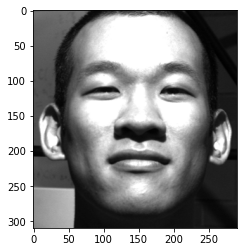

In [8]:
plt.imshow(cv2.cvtColor(images[1],cv2.COLOR_BGR2RGB))

In [15]:
images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [17]:
images.shape

(1755,)

In [18]:
h = []
w = []
for image in images:
  h.append(image.shape[0])
  w.append(image.shape[1])
print('avg shape : '+str(int(np.mean(h)))+","+str(int(np.mean(w))))

avg shape : 303,270


In [19]:
def reshape_images(images):
  reshaped_img = []
  for image in images:
    reshaped_img.append(cv2.resize(image,(270,300)))
  return reshaped_img
images = reshape_images(images)

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels = lb.fit_transform(label)

In [21]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(labels)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y,test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)



In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
trainGenerator = ImageDataGenerator(zoom_range=0.1,rotation_range=10,horizontal_flip=True)
testGenerator = ImageDataGenerator()


In [25]:
train = trainGenerator.flow(X_train,y_train,batch_size=8)
test = testGenerator.flow(X_test,y_test,batch_size=8)

In [27]:
from tensorflow.keras.applications import VGG16
vgg_model = VGG16(include_top=False,input_shape=(300,270,3),weights='imagenet')
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 270, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 270, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 270, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 135, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 135, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 135, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 67, 128)       0     

In [28]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Model

for layer in vgg_model.layers:
  layer.trainable = False

In [32]:
my_model = vgg_model.output

my_model = Flatten()(my_model)

my_model = Dense(1024,activation='relu')(my_model)
my_model = Dense(512,activation='relu')(my_model)
my_model = Dense(256,activation='relu')(my_model)
my_model = Dense(128,activation='relu')(my_model)
my_model = Dense(64,activation='relu')(my_model)

my_model = Dense(3,activation='softmax')(my_model)



In [33]:
model = Model(vgg_model.input,my_model)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 270, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 270, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 270, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 135, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 135, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 135, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 67, 128)       0   

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
history = model.fit_generator(train,validation_data=test,shuffle=True,steps_per_epoch=16,epochs=5,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
16/16 [==============================] - 387s 25s/step - loss: 6.3362 - accuracy: 0.4531 - val_loss: 2.5373 - val_accuracy: 0.7151
Epoch 2/5
16/16 [==============================] - 389s 25s/step - loss: 1.3417 - accuracy: 0.7891 - val_loss: 0.2198 - val_accuracy: 0.9573
Epoch 3/5
16/16 [==============================] - 383s 25s/step - loss: 0.6252 - accuracy: 0.8672 - val_loss: 0.1924 - val_accuracy: 0.9687
Epoch 4/5
16/16 [==============================] - 385s 25s/step - loss: 0.4927 - accuracy: 0.9375 - val_loss: 0.0265 - val_accuracy: 0.9943
Epoch 5/5
16/16 [==============================] - 401s 26s/step - loss: 0.5486 - accuracy: 0.9688 - val_loss: 0.0725 - val_accuracy: 0.9772


In [52]:
test_img = cv2.imread('/content/yaleB15_P00A+000E+20.pgm')
test_img= cv2.resize(test_img,(270,300))


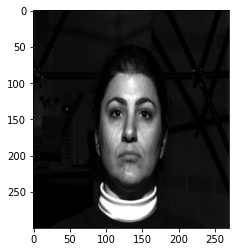

In [53]:
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))

In [54]:
test_img = test_img.reshape(1,300,270,3)

In [55]:
pred = model.predict(test_img)

In [56]:
index = np.argmax(pred)
print(label[index])

yaleB13
